In [192]:
# Make default library imports
import pandas as pd
import numpy as np
import preprocessor as p
# import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [193]:
# Read the data from file
data = pd.read_csv('Sentiment140.tenPercent.sample.tweets.tsv', delimiter='\t')
data.head()


,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


Null values present in labels: False
Null values present in tweet text: False



<BarContainer object of 2 artists>

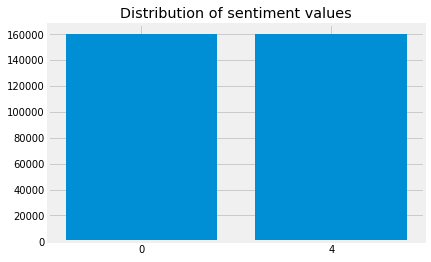

In [194]:
# Check for null values in the data
# Plot label histogram
print('Null values present in labels: ' + str(data['sentiment_label'].isnull().values.any()))
print('Null values present in tweet text: ' + str(data['tweet_text'].isnull().values.any()))
print()

plt.title('Distribution of sentiment values')
plt.bar(['0','4'], [len(data['sentiment_label'].where(data['sentiment_label'] == 0)), len(data['sentiment_label'].where(data['sentiment_label'] == 4))])


In [195]:
# Clean the tweets. Remove the following:
# - URLS
# - Hashtags
# - Mentions
# - Reserved words (RT, FAV)
# - Emojis
# - Smileys
# - Numbers

clean_data = data.copy()
clean_data.loc[data['sentiment_label'] == 4, 'sentiment_label'] = 1

clean_data['tweet_text'] = clean_data['tweet_text'].apply(lambda row: p.clean(row))
clean_data.head()



,sentiment_label,tweet_text
0,1,"Hey dear, Happy Friday to You Already had your..."
1,1,Ughhh layin downnnn Waiting for zeina to cook ...
2,0,"I reckon he'll play, even if he's not %...but ..."
3,0,I know! Saw it on the news!
4,0,very sad that has closed down. One of the few ...


In [201]:
# Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop(columns=['sentiment_label']), clean_data['sentiment_label'], test_size=0.2)

116915    1
77951     1
128035    0
93095     0
121848    1
Name: sentiment_label, dtype: int64